# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [2]:
DATA_FOLDER = 'Data' # Use the data folder provided in Tutorial 02 - Intro to Pandas.
import pandas as pd
import numpy as np

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

In [3]:
# Write your answer here

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

**Solution:**

First, we want to combine the 9+1 different Excel spreadsheets into one data frame. We do this by for-loop: first, outside the loop, we read the first file (MID1.xls) to a data frame (rna_data), and then loop over numbers 2-9 and read and append each file's contents to our data frame. In order to preserve information on which entry came from which file, we create a `MultiIndex` index for the data frame, where the first level corresponds to the file name and the second level is the index of the entry (row number in file, starting from 0). Column names in the data frame default to 0 and 1, and we leave them as is, since we don't have more information on what the data represents.

Once the data has been read, we name the first level of the `MultiIndex` "BARCODE" and the second level "index_no". Then, we read the metadata file (metadata.xls) to a data frame using the column "BARCODE" as index, and join it with the rna_data data frame. The join is performed on the common index, which in this case is "BARCODE". Since all "BARCODE" values are contained in both data frames, it doesn't matter whether we do an inner or outer join.

Finally, we change NaN values to "unknown", and check that our indices are unique and that no NaN values are left in the data frame.

In [4]:
# Load first file
rna_data = pd.read_excel(DATA_FOLDER+"/microbiome/MID1.xls",sheetname="Sheet 1",header=None)
rna_indices = [["MID1"]*len(rna_data.index), list(rna_data.index)] # List of lists of first and second level indices
tuples = list(zip(*rna_indices)) # Make indices into tuples of first and second level
rna_data.index = pd.MultiIndex.from_tuples(tuples) # Create MultiIndex where each index is from a tuple

# Append other files
for ii in range(2,10):
    next_sheet = pd.read_excel(DATA_FOLDER+"/microbiome/MID%d.xls" % ii,sheetname="Sheet 1",header=None)
    rna_indices = [["MID%d" % ii]*len(next_sheet.index), list(next_sheet.index)] # First level index according to file
    tuples = list(zip(*rna_indices))
    next_sheet.index = pd.MultiIndex.from_tuples(tuples)
    rna_data = rna_data.append(next_sheet,verify_integrity=True) # Append next sheet to data frame

# Change index names to match metadata
rna_data.index.names = ["BARCODE","index_no"]

# Read and join metadata, use BARCODE as index for metadata
rna_metadata = pd.read_excel(DATA_FOLDER+"/microbiome/metadata.xls",index_col="BARCODE")
rna_data = rna_data.join(rna_metadata, how='outer')

# Change NaNs to unknown
rna_data.fillna(value="unknown",inplace=True)

# Check that indices are unique and that no NaNs are left, and print data frame dimensions
print("All indices are unique: " + str(rna_data.index.is_unique))
print("Data frame contains NaN values: " + str(rna_data.isnull().any().any()))
print("Data frame dimensions: " + str(rna_data.shape))

All indices are unique: True
Data frame contains NaN values: False
Data frame dimensions: (2396, 4)


In [5]:
rna_data

0     1  \
BARCODE index_no                                                            
MID1    0         Archaea "Crenarchaeota" Thermoprotei Desulfuro...     7   
        1         Archaea "Crenarchaeota" Thermoprotei Desulfuro...     2   
        2         Archaea "Crenarchaeota" Thermoprotei Sulfoloba...     3   
        3         Archaea "Crenarchaeota" Thermoprotei Thermopro...     3   
        4         Archaea "Euryarchaeota" "Methanomicrobia" Meth...     7   
        5         Archaea "Euryarchaeota" "Methanomicrobia" Meth...     1   
        6         Archaea "Euryarchaeota" "Methanomicrobia" Meth...     1   
        7         Archaea "Euryarchaeota" Archaeoglobi Archaeogl...     1   
        8         Archaea "Euryarchaeota" Archaeoglobi Archaeogl...     1   
        9         Archaea "Euryarchaeota" Halobacteria Halobacte...     1   
        10        Archaea "Euryarchaeota" Halobacteria Halobacte...     4   
        11        Archaea "Euryarchaeota" Halobacteria Halobacte...     1   
        12        Archaea "Euryarchaeota" Halobacteria Halobacte...     2   
        13        Archaea "Euryarchaeota" Halobacteria Halobacte...     4   
        14        Archaea "Euryarchaeota" Methanococci Methanoco...     1   
        15        Archaea "Euryarchaeota" Methanopyri Methanopyr...    12   
        16        Archaea "Euryarchaeota" Thermoplasmata Thermop...     2   
        17        Bacteria "Actinobacteria" Actinobacteria Actin...     2   
        18        Bacteria "Actinobacteria" Actinobacteria Actin...     1   
        19        Bacteria "Actinobacteria" Actinobacteria Actin...     1   
        20        Bacteria "Actinobacteria" Actinobacteria Actin...     1   
        21        Bacteria "Actinobacteria" Actinobacteria Actin...     2   
        22        Bacteria "Actinobacteria" Actinobacteria Actin...    53   
        23        Bacteria "Actinobacteria" Actinobacteria Actin...     1   
        24        Bacteria "Actinobacteria" Actinobacteria Actin...     2   
        25        Bacteria "Actinobacteria" Actinobacteria Actin...     3   
        26        Bacteria "Actinobacteria" Actinobacteria Actin...     1   
        27        Bacteria "Actinobacteria" Actinobacteria Actin...    99   
        28        Bacteria "Actinobacteria" Actinobacteria Actin...    17   
        29        Bacteria "Actinobacteria" Actinobacteria Actin...     2   
...                                                             ...   ...   
MID9    251       Bacteria "Proteobacteria" Gammaproteobacteria ...    10   
        252       Bacteria "Proteobacteria" Gammaproteobacteria ...     1   
        253       Bacteria "Proteobacteria" Gammaproteobacteria ...     1   
        254       Bacteria "Proteobacteria" Gammaproteobacteria ...     1   
        255       Bacteria "Proteobacteria" Gammaproteobacteria ...    12   
        256       Bacteria "Proteobacteria" Gammaproteobacteria ...     4   
        257       Bacteria "Proteobacteria" Gammaproteobacteria ...   805   
        258       Bacteria "Proteobacteria" Gammaproteobacteria ...   862   
        259       Bacteria "Proteobacteria" Gammaproteobacteria ...    12   
        260       Bacteria "Proteobacteria" Gammaproteobacteria ...  3534   
        261       Bacteria "Proteobacteria" Gammaproteobacteria ...     4   
        262       Bacteria "Proteobacteria" Gammaproteobacteria ...     1   
        263       Bacteria "Proteobacteria" Gammaproteobacteria ...    25   
        264       Bacteria "Proteobacteria" Gammaproteobacteria ...     2   
        265       Bacteria "Proteobacteria" Gammaproteobacteria ...     3   
        266       Bacteria "Proteobacteria" Gammaproteobacteria ...     2   
        267       Bacteria "Proteobacteria" Gammaproteobacteria ...     1   
        268       Bacteria "Proteobacteria" Gammaproteobacteria ...     3   
        269       Bacteria "Proteobacteria" Gammaproteobacteria ...     2   
        270       Bacteria "Proteobacteria" Gammaproteobacteri

## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [6]:

#display data in the frontend 

from IPython.core.display import HTML
HTML(filename='Data'+'/titanic.html')


Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

In [178]:


# import data from titanic.xls
titanic_data = pd.read_excel(DATA_FOLDER+"/titanic.xls")

# 1. describe the type
#for i in range (0,titanic_data.shape[1])
#print(titanic_data.dtypes[;i], )

# and value range of each attribute

titanic_data.pclass.max()
print (titanic_data.shape[1])
print(titanic_data.dtypes[2])
print(titanic_data.name[4])

14
object
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)


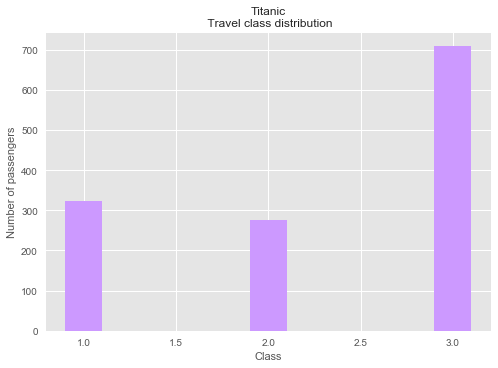

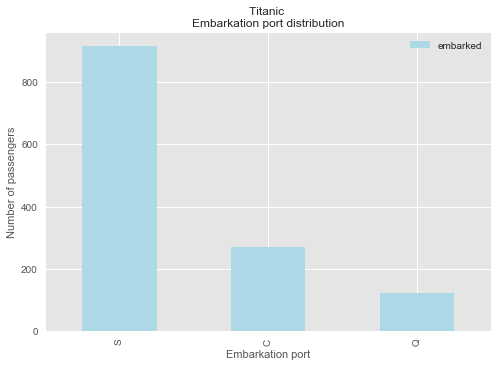

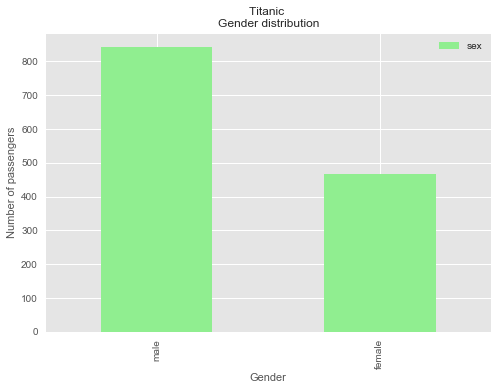

In [402]:
# 2. plot histograms for the travel class, embrakation port, sex and age 

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')

titanic_data.pclass.hist(bins=[1,2,3,4], align='left', rwidth=0.2, color='#cc99ff')
plt.title('Titanic\n Travel class distribution')
plt.xlabel('Class')
plt.ylabel('Number of passengers')


titanic_data[['embarked']].apply(pd.value_counts).plot.bar(title='Titanic \nEmbarkation port distribution', color='lightblue')
plt.xlabel('Embarkation port')
plt.ylabel('Number of passengers')



titanic_data[['sex']].apply(pd.value_counts).plot.bar(title='Titanic \nGender distribution', color='lightgreen')
plt.xlabel('Gender')
plt.ylabel('Number of passengers')



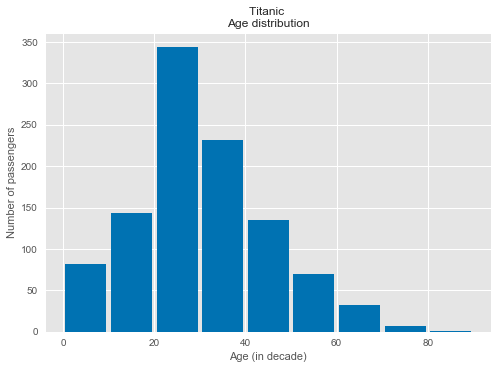

In [403]:
titanic_data.age.hist(bins=list(range(0,100,10)), rwidth=0.9)

plt.title('Titanic \nAge distribution')
plt.xlabel('Age (in decade)')
plt.ylabel('Number of passengers')


(-1.1279907900219885,
 1.1013328951274537,
 -1.1100304308643896,
 1.1101208102112665)

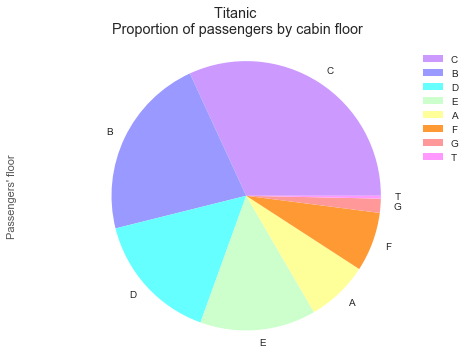

In [404]:
# 3. Calculate the proportion of passengers by cabin floor. 

#Create a new comlumn with the floor 
titanic_data['floor']=titanic_data.cabin.str[0]


#Sum all the passengers in each floor and plot the result in a pie chart
titanic_data[['floor']].apply(pd.value_counts).plot.pie(title='Titanic \nProportion of passengers by cabin floor', subplots=True, colors=('#cc99ff','#9999ff','#66ffff','#ccffcc','#ffff99','#ff9933','#ff9999','#ff99ff'))
plt.ylabel("Passengers' floor")
plt.axis('equal')   #makes the pie to be a beautiful circle

(-1.1249732062244544,
 1.2104443743078817,
 -1.2182557512572367,
 1.1255802662179848)

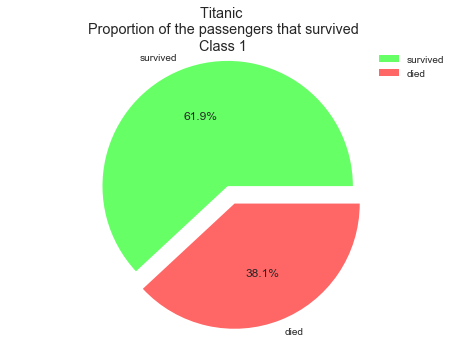

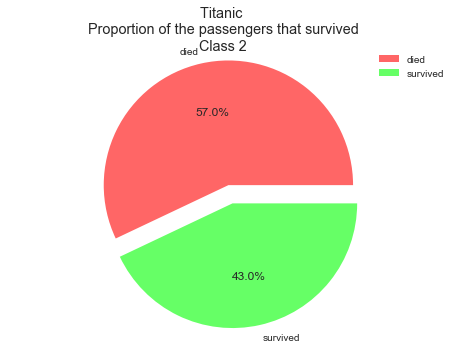

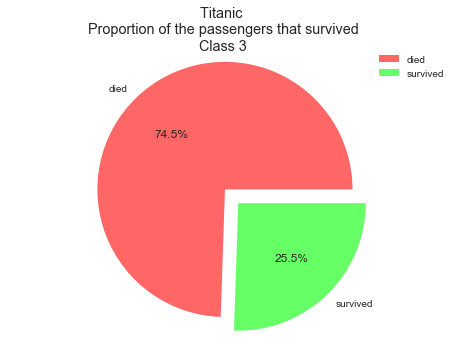

In [405]:
# 4. For each travel class, calculate the proportion of the passengers that survived.


#Class 1
#select the data corresponding to class 1 
df= titanic_data.loc[titanic_data['pclass'] == 1]
#plot this data into a pie
df_title= 'Class 1'
df[['survived']].apply(pd.value_counts).plot.pie(title='Titanic \n Proportion of the passengers that survived \n'+df_title, subplots=True, labels=('survived', 'died'), explode=(0, 0.15), autopct='%1.1f%%', colors=('#66ff66','#ff6666'))
plt.ylabel('')
plt.axis('equal')

#class 2 
df= titanic_data.loc[titanic_data['pclass'] == 2]
df_title= 'Class 2'
df[['survived']].apply(pd.value_counts).plot.pie(title='Titanic \n Proportion of the passengers that survived \n'+df_title, subplots=True, labels=('died','survived'), explode=(0, 0.15), autopct='%1.1f%%', colors=('#ff6666','#66ff66'))
plt.ylabel('')
plt.axis('equal')

#class 3 
df= titanic_data.loc[titanic_data['pclass'] == 3]
df_title= 'Class 3'
df[['survived']].apply(pd.value_counts).plot.pie(title='Titanic \n Proportion of the passengers that survived \n'+df_title, subplots=True, labels=('died','survived'), explode=(0, 0.15), autopct='%1.1f%%', colors=('#ff6666','#66ff66'))
plt.ylabel('')
plt.axis('equal')


sex     pclass
female  1         0.965278
        2         0.886792
        3         0.490741
male    1         0.340782
        2         0.146199
        3         0.152130
dtype: float64


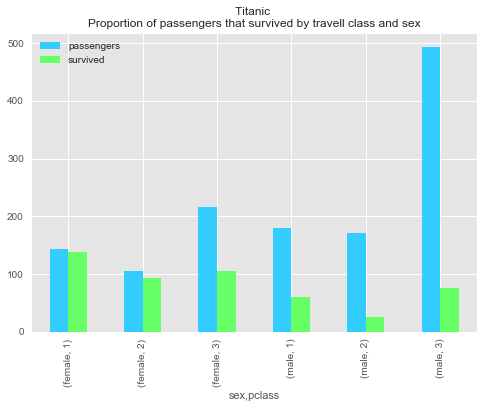

In [458]:
# Calculate the proportion of the passengers that survived by travel class and sex. 

#calculate the number of passengers for which we know whether they survived (by age and class)
df2=(titanic_data.groupby(['sex','pclass']).count())[['survived']]
df2.columns=['passengers']

#calculate how many of these passengers survived (by age and class) 
df3=(titanic_data.groupby(['sex','pclass']).sum())[['survived']]


#calculate the proportion of people that survived (by age and class)
proportion=df3['survived']/df2['passengers']
print(proportion)

#create a table with the two columns we are interested in
dftotal= pd.concat([df2, df3], axis=1)


dftotal[['passengers','survived']].plot.bar(title='Titanic \nProportion of passengers that survived by travell class and sex', color=('#33ccff','#66ff66'))


In [461]:
#5. Create 2 equally populated age categories and calculate survival proportions by age category, travel class and sex. 
#Present your results in a DataFrame with unique index.

#calculate the median of the age distribution
med=titanic_data[['age']].median()


#select all the passengers whose age is lower than or equal to med and add a column to specify which age category they are in
lower_df=(titanic_data.loc[titanic_data['age'] <= int(med)])
lower_df['age_category']=0

#select all the passengers whose age is greater than med and add a column to specify which age category they are in
greater_df=(titanic_data.loc[titanic_data['age'] > int(med)])
greater_df['age_category']=1

#join back the two dataframes
age_distrib_df=pd.concat([lower_df,greater_df])



C:\Users\Utilisateur\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Utilisateur\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [466]:

#calculate the number of passengers for which we know whether they survived (by age and class)
total_pass_df=(age_distrib_df.groupby(['age_category','sex','pclass']).count())[['survived']]
total_pass_df.columns=['passengers']

#calculate how many of these passengers survived (by age and class) 
survived_pass_df=(age_distrib_df.groupby(['age_category','sex','pclass']).sum())[['survived']]


#calculate the proportion of people that survived (by age and class)
proportion_df=survived_pass_df['survived']/total_pass_df['passengers']


#create a table with the two columns we are interested in

dftotal= pd.concat([total_pass_df, survived_pass_df,proportion_df], axis=1)
dftotal.columns=('passengers','survived','survival proportion')
print(dftotal)



                            passengers  survived  survival proportion
age_category sex    pclass                                           
0            female 1               41        39             0.951220
                    2               56        51             0.910714
                    3              109        56             0.513761
             male   1               32        17             0.531250
                    2               74        16             0.216216
                    3              224        41             0.183036
1            female 1               92        89             0.967391
                    2               47        41             0.872340
                    3               43        16             0.372093
             male   1              119        36             0.302521
                    2               84         7             0.083333
                    3              125        18             0.144000
